## Data Preprocessing

In [77]:
# core libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')

# preprocessing libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedGroupKFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix

# statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

# set style for better visualisations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## Outlier Check

In [78]:
df="cleaned_Visa_dataset.csv"

In [79]:
data=pd.read_csv(df)
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [80]:
cat_features=data.select_dtypes(include=['object']).columns
cat_features

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [81]:
num_features=data.select_dtypes(include=['object']).columns
num_features

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

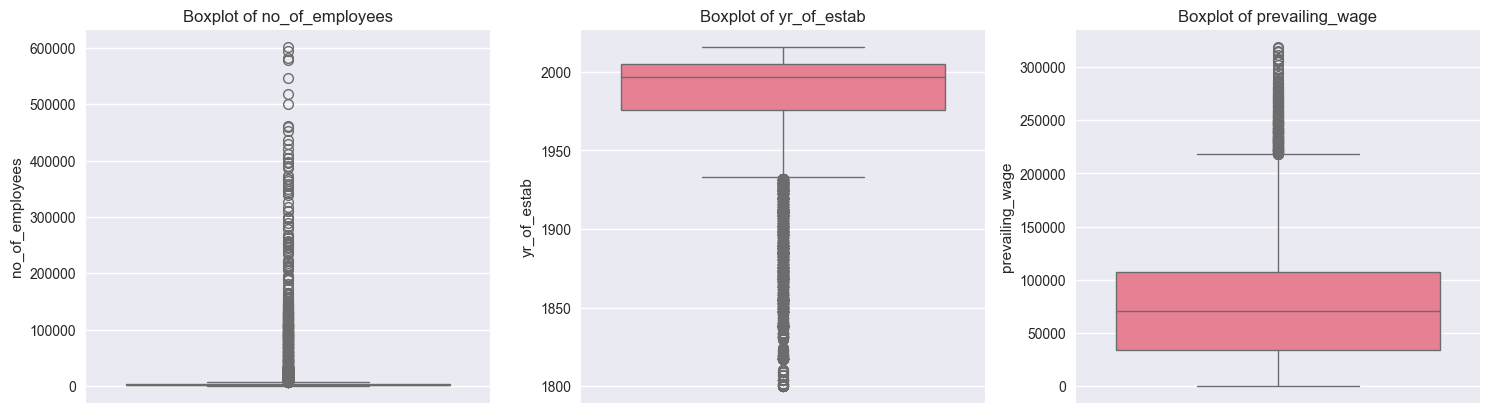

In [82]:
# Selecting numeric columns excluding 'Risk'
num_features = data.select_dtypes(include=np.number).columns.tolist()

# Plot the boxplots for all numeric columns (except Risk)
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the grid size (rows, columns) as needed
    sns.boxplot(data=data, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.tight_layout()

plt.show()

## Removing Outliers from the data using the IQR (Interquartile Range) method.

In [83]:
def remove_outliers(data, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3  (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        # Calculate  the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    return data
# Selecting numeric columns in the dataset
num_features = data.select_dtypes(include=np.number).columns.tolist()

#  Remove outliers from the numeric columns
cleaned_data = remove_outliers(data, num_features)

# print the shape of the cleaned data to check out for the removed outliers
print(f"original data shape: {data.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")
data = cleaned_data


original data shape: (25480, 11)
Cleaned data shape: (20530, 11)


In [84]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified


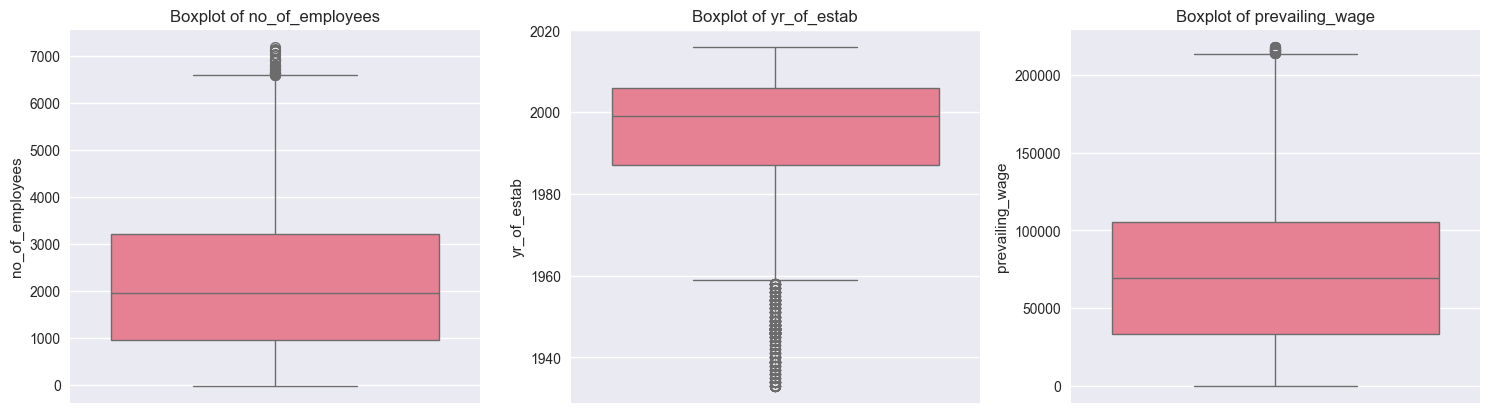

In [85]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Plot the boxplots for all numeric columns 
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)  # Adjust the grid size (rows, columns) as needed
    sns.boxplot(data=data, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.tight_layout()
plt.show()

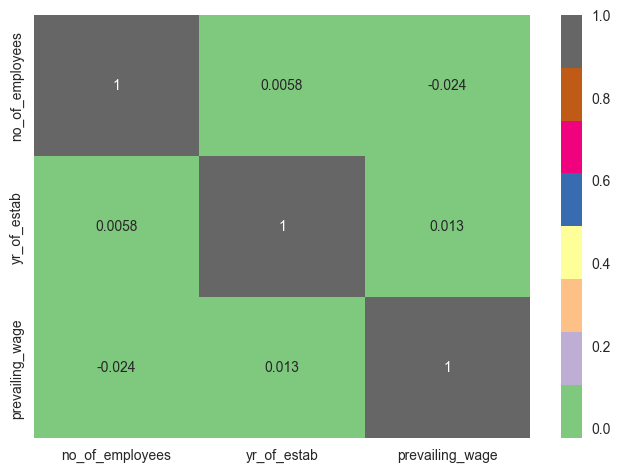

In [86]:
correlation_matrix = data[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Accent')
plt.show()

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20530 entries, 1 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              20530 non-null  object 
 1   education_of_employee  20530 non-null  object 
 2   has_job_experience     20530 non-null  object 
 3   requires_job_training  20530 non-null  object 
 4   no_of_employees        20530 non-null  int64  
 5   yr_of_estab            20530 non-null  int64  
 6   region_of_employment   20530 non-null  object 
 7   prevailing_wage        20530 non-null  float64
 8   unit_of_wage           20530 non-null  object 
 9   full_time_position     20530 non-null  object 
 10  case_status            20530 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.9+ MB


In [88]:
print(data['case_status'].value_counts())  # Check distribution of the target variable

case_status
Certified    13667
Denied        6863
Name: count, dtype: int64


# Apply log transformation to the yr_of_estab column

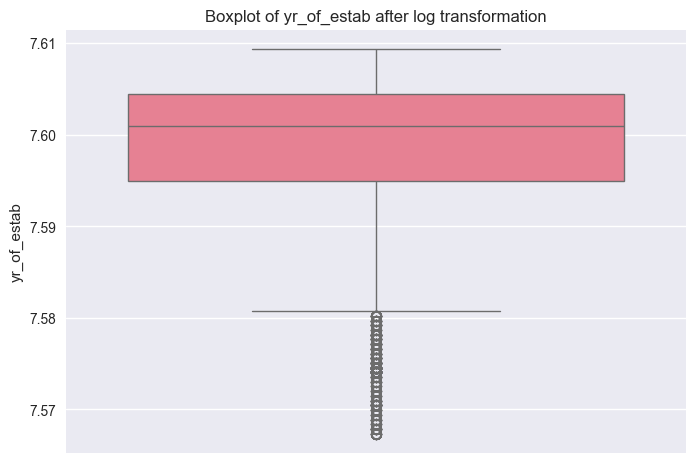

In [89]:
data['yr_of_estab'] = np.log1p(data['yr_of_estab'])

# Plot boxplot again to check the impact of the transformation
sns.boxplot(data=data['yr_of_estab'])
plt.title('Boxplot of yr_of_estab after log transformation')
plt.show()

In [90]:
# 1. Define the feature variables (X) and target variable (y)
X = data.drop('case_status', axis=1)  # Features (drop the target column)
Y = data['case_status']  # Target (case_status)

X = pd.get_dummies(X, drop_first=True)  ## Complete the code to create dummies for X

# 2. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

# 'test_size=0.3' means 30% of the data will be used for testing, 70% for training
# 'random_state=1' ensures reproducibility (same split every time the code is run)

In [91]:
print("shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

shape of Training set :  (14371, 21)
Shape of test set :  (6159, 21)
Percentage of classes in training set:
case_status
Certified    0.665716
Denied       0.334284
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
Certified    0.665692
Denied       0.334308
Name: proportion, dtype: float64


# Feature Engineering

In [92]:
print("FEATURE ENGINEERING BASED ON EDA RECOMMENDATIONS")

data['unit_of_wage_in_hr']= data['unit_of_wage'].map({'Year': 8760, 'Month': 730.5, 'Week': 168, 'Hour': 1})
data['unit_of_wage_in_hr'].value_counts()


FEATURE ENGINEERING BASED ON EDA RECOMMENDATIONS


unit_of_wage_in_hr
8760.0    18536
1.0        1721
168.0       206
730.5        67
Name: count, dtype: int64

In [93]:
data['prevailing_wage_per_hour']= data['prevailing_wage']/ data['unit_of_wage_in_hr']

In [94]:
data.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,unit_of_wage_in_hr,prevailing_wage_per_hour
1,Asia,Master's,Y,N,2412,7.602401,Northeast,83425.65,Year,Y,Certified,8760.0,9.523476
4,Africa,Master's,Y,N,1082,7.603898,South,149907.39,Year,Y,Certified,8760.0,17.112716
5,Asia,Master's,Y,N,2339,7.607381,South,78252.14,Year,Y,Certified,8760.0,8.932893
6,Asia,Bachelor's,N,N,4985,7.598399,South,53635.39,Year,Y,Certified,8760.0,6.122761
8,Asia,Bachelor's,N,N,4810,7.607381,Midwest,74362.19,Year,Y,Certified,8760.0,8.488834


Featuring Encoding

In [95]:
from sklearn.calibration import LabelEncoder


categorical_features=['requires_job_training', 'has_job_experience', 'full_time_position', 'case_status']
multiple_categorical_ordinal_features=["education_of_employee", "unit_of_wage"]
multiple_categorical_norminal_features=["region_of_employment", "continent"]

le=LabelEncoder()

for cat in categorical_features:
    data[cat]=le.fit_transform(data[cat])

for cat in multiple_categorical_ordinal_features:
    data[cat]=le.fit_transform(data[cat])

for cat in multiple_categorical_norminal_features:
    data[cat]=le.fit_transform(data[cat])
    


In [96]:
data.head(2)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,unit_of_wage_in_hr,prevailing_wage_per_hour
1,1,3,1,0,2412,7.602401,2,83425.65,3,1,0,8760.0,9.523476
4,0,3,1,0,1082,7.603898,3,149907.39,3,1,0,8760.0,17.112716


Feature Selection

In [97]:
# Feature selection based on EDA correlation evidence
print("=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===")

# Separate features and target
X = data.drop('case_status', axis=1)
y = data['case_status']

print(f"Total features available: {X.shape[1]}")

# EDA-identified high-signal features (|correlation| > 0.2)
high_signal_features = [ 'prevailing_wage', 'require_job_traing', 'education_of_employee']
print(f"\nEDA-identified high-signal features: {high_signal_features}")

# EDA-identified low-signal features (|correlation| < 0.1) 
low_signal_features = ['has_job_expreriences', 'full_time_position']
print(f"EDA-identified low-signal features: {low_signal_features}")

# Check which features are actually available
available_high_signal = [f for f in high_signal_features if f in X.columns]
available_low_signal = [f for f in low_signal_features if f in X.columns]

print(f"\nAvailable high-signal features: {available_high_signal}")
print(f"Available low-signal features: {available_low_signal}")

# Create feature sets for evaluation
print("\n=== FEATURE SETS FOR EVALUATION ===")

# Set 1: All original features (excluding low-signal)
features_exclude_low_signal = [col for col in X.columns if col not in low_signal_features]
print(f"Set 1 - Exclude low-signal features: {len(features_exclude_low_signal)} features")

# Set 2: High-signal + engineered features
high_signal_plus_engineered = available_high_signal + [col for col in X.columns if any(keyword in col.lower() for keyword in ['ratio', 'interaction', 'balance', 'total', 'log'])]
print(f"Set 2 - High-signal + engineered: {len(high_signal_plus_engineered)} features")

# Set 3: All features (for comparison)
all_features = list(X.columns)
print(f"Set 3 - All features: {len(all_features)} features")

# Let's use Set 2 (high-signal + engineered) as recommended by EDA
selected_features = high_signal_plus_engineered
print(f"\n✓ Selected feature set: {len(selected_features)} features")
print("Selected features:", selected_features)


=== FEATURE SELECTION BASED ON EDA CORRELATION EVIDENCE ===
Total features available: 12

EDA-identified high-signal features: ['prevailing_wage', 'require_job_traing', 'education_of_employee']
EDA-identified low-signal features: ['has_job_expreriences', 'full_time_position']

Available high-signal features: ['prevailing_wage', 'education_of_employee']
Available low-signal features: ['full_time_position']

=== FEATURE SETS FOR EVALUATION ===
Set 1 - Exclude low-signal features: 11 features
Set 2 - High-signal + engineered: 2 features
Set 3 - All features: 12 features

✓ Selected feature set: 2 features
Selected features: ['prevailing_wage', 'education_of_employee']


In [98]:
# Stratified data splitting based on EDA findings about class imbalance
print("=== STRATIFIED DATA SPLITTING ===")
print("EDA identified class imbalance - using stratified splitting to preserve class distribution")

# Select the chosen features
X_selected = X[selected_features]
print(f"Selected features shape: {X_selected.shape}")

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 75% train, 25% validation (of the 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"\nData split results:")
print(f"Training set: {X_train.shape} ({(X_train.shape[0]/len(X_selected))*100:.1f}%)")
print(f"Validation set: {X_val.shape} ({(X_val.shape[0]/len(X_selected))*100:.1f}%)")
print(f"Test set: {X_test.shape} ({(X_test.shape[0]/len(X_selected))*100:.1f}%)")

# Check class distribution in each set (should be similar due to stratification)
print(f"\nClass distribution verification:")
print("Training set quality distribution:")
print(y_train.value_counts().sort_index())
print("\nValidation set quality distribution:")
print(y_val.value_counts().sort_index())
print("\nTest set quality distribution:")
print(y_test.value_counts().sort_index())


=== STRATIFIED DATA SPLITTING ===
EDA identified class imbalance - using stratified splitting to preserve class distribution
Selected features shape: (20530, 2)

Data split results:
Training set: (12318, 2) (60.0%)
Validation set: (4106, 2) (20.0%)
Test set: (4106, 2) (20.0%)

Class distribution verification:
Training set quality distribution:
case_status
0    8200
1    4118
Name: count, dtype: int64

Validation set quality distribution:
case_status
0    2734
1    1372
Name: count, dtype: int64

Test set quality distribution:
case_status
0    2733
1    1373
Name: count, dtype: int64


Model Training

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train baseline model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
# Predict
# y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.3).astype(int)
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.33438869946419875

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2733
           1       0.33      1.00      0.50      1373

    accuracy                           0.33      4106
   macro avg       0.17      0.50      0.25      4106
weighted avg       0.11      0.33      0.17      4106


Confusion Matrix:
 [[   0 2733]
 [   0 1373]]


              precision    recall  f1-score   support

           0       0.69      0.52      0.59      2733
           1       0.36      0.53      0.43      1373

    accuracy                           0.52      4106
   macro avg       0.52      0.53      0.51      4106
weighted avg       0.58      0.52      0.54      4106



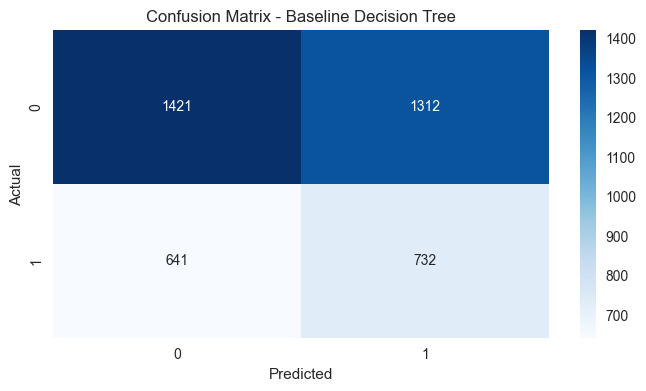

In [100]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()